Enter the desired stock symbol > TSLA
Enter the desired start date (format- yyyy-mm-dd) > 2010-01-01
Enter the desired end date (format- yyyy-mm-dd) > 2023-05-27
[*********************100%***********************]  1 of 1 completed
Epoch 1/5
100/100 [==============================] - 10s 58ms/step - loss: 0.0062
Epoch 2/5
100/100 [==============================] - 6s 64ms/step - loss: 7.3409e-04
Epoch 3/5
100/100 [==============================] - 5s 53ms/step - loss: 6.2310e-04
Epoch 4/5
100/100 [==============================] - 6s 58ms/step - loss: 4.7793e-04
Epoch 5/5
1/1 [==============================] - 1s 690ms/step


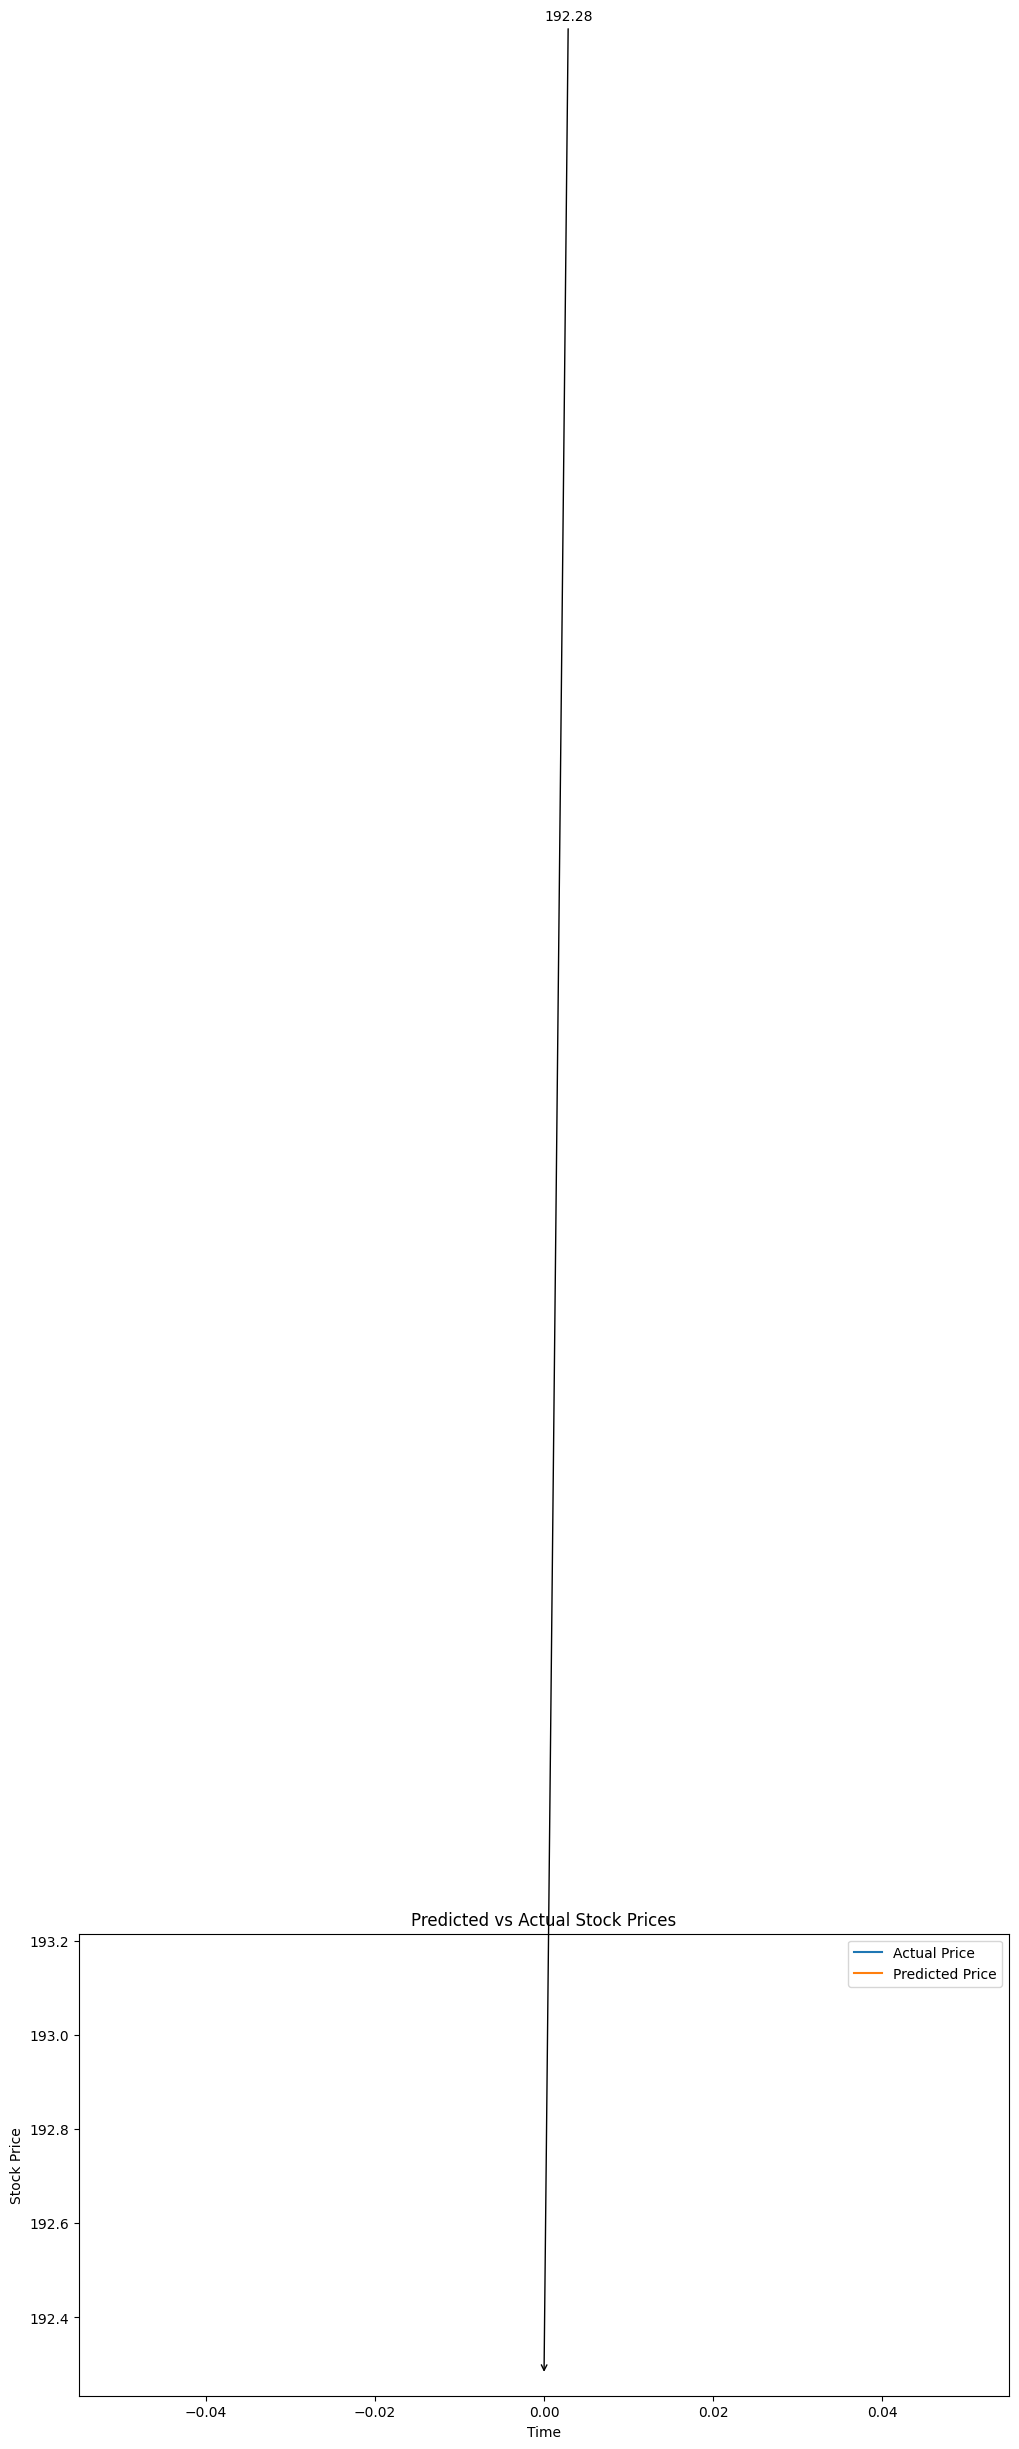

100/100 [==============================] - 2s 17ms/step - loss: 4.2682e-04
Mean Squared Error: 0.0004268215561751276


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Define the stock symbol and date range for data retrieval
# stock_symbol = "AAPL"  # Replace with your desired stock symbol
stock_symbol=input("Enter the desired stock symbol > ")
# start_date = "2010-01-01"  # Replace with your desired start date
start_date=input("Enter the desired start date (format- yyyy-mm-dd) > ")
# end_date = "2022-12-31"  # Replace with your desired end date
end_date=input("Enter the desired end date (format- yyyy-mm-dd) > ")

# Fetch the stock data using Yahoo Finance API
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Preprocess the stock data
data = stock_data[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the number of previous time steps to use for prediction
n_steps = 60

# Prepare the training data
X_train = []
y_train = []
for i in range(n_steps, len(scaled_data)):
    X_train.append(scaled_data[i - n_steps:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the training data to fit the LSTM input shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Prepare the test data
test_data = scaled_data[-n_steps:]
X_test = []
X_test.append(test_data)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions on the test data
predicted_data = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_data)

# Prepare the actual prices for plotting
actual_prices = data[-len(predicted_prices):]

# Plot the predicted and actual prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices')
plt.legend()

# Add annotations for predicted prices
for i in range(len(predicted_prices)):
    plt.annotate(f'{predicted_prices[i][0]:.2f}', xy=(i, predicted_prices[i][0]),
                 xytext=(i, predicted_prices[i][0] + 5),
                 arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.show()

# Evaluate the model performance
mse = model.evaluate(X_train, y_train)
print("Mean Squared Error:", mse)


Enter the stock symbol (e.g., AAPL): TSLA
Enter the start date (YYYY-MM-DD): 2000-01-01
Enter the end date (YYYY-MM-DD): 2023-05-27
[*********************100%***********************]  1 of 1 completed
Enter the number of epochs > 10
Epoch 1/10
99/99 [==============================] - 4s 4ms/step - loss: 0.0325
Epoch 2/10
99/99 [==============================] - 0s 4ms/step - loss: 2.7329e-04
Epoch 3/10
99/99 [==============================] - 0s 4ms/step - loss: 2.2622e-04
Epoch 4/10
99/99 [==============================] - 0s 4ms/step - loss: 1.9899e-04
Epoch 5/10
99/99 [==============================] - 0s 5ms/step - loss: 1.8271e-04
Epoch 6/10
99/99 [==============================] - 0s 4ms/step - loss: 1.6089e-04
Epoch 7/10
99/99 [==============================] - 0s 4ms/step - loss: 1.6074e-04
Epoch 8/10
99/99 [==============================] - 0s 4ms/step - loss: 1.4332e-04
Epoch 9/10
99/99 [==============================] - 0s 4ms/step - loss: 1.3445e-04
Epoch 10/10
4/4 [=======

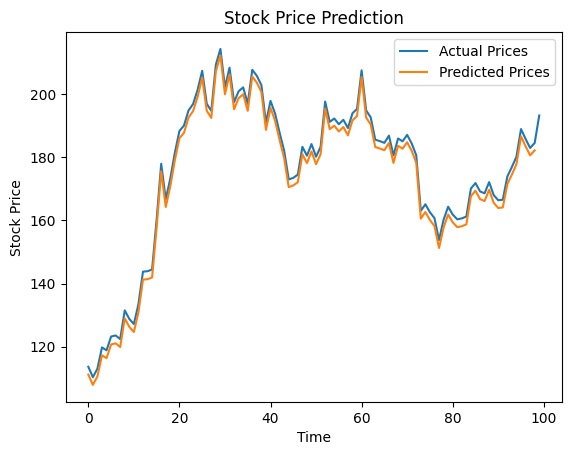

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Set the seed for reproducibility
np.random.seed(42)

# Prompt the user for the stock symbol and date range
symbol = input("Enter the stock symbol (e.g., AAPL): ")
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")

# Load historical stock data using Yahoo Finance API
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Preprocess the stock data
data = stock_data[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_data = scaled_data[:-100]
test_data = scaled_data[-100:]

# Split the data into input and output
X_train, y_train = train_data[:-1], train_data[1:]
X_test, y_test = test_data[:-1], test_data[1:]

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

epoch=int(input("Enter the number of epochs > "))

# Train the LSTM model
model.fit(X_train, y_train, epochs=epoch, batch_size=32)

# Predict the stock prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the predicted prices and actual prices
plt.plot(scaler.inverse_transform(test_data), label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()

plt.show()


# ADDED ERROR AND ACCURACY



Enter the stock symbol (e.g., AAPL): TSLA
Enter the start date (YYYY-MM-DD): 2000-01-01
Enter the end date (YYYY-MM-DD): 2023-05-27
[*********************100%***********************]  1 of 1 completed
Enter the number of epochs > 10
Epoch 1/10
99/99 [==============================] - 5s 7ms/step - loss: 0.0850
Epoch 2/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0149
Epoch 3/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 4/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 5/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 6/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 7/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 8/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 9/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0109
Epoch 10/10
4/4 [==============================] - 1s 3m

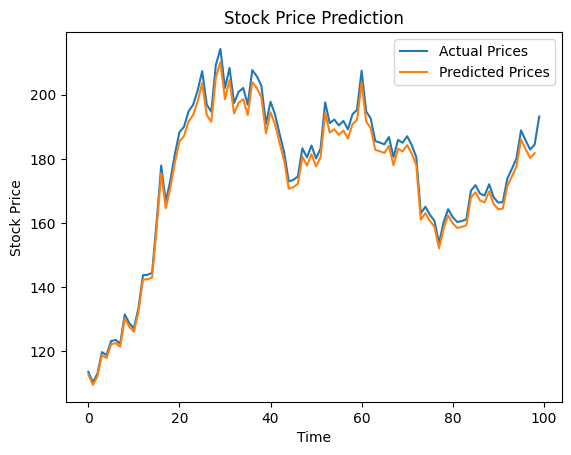

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Set the seed for reproducibility
np.random.seed(42)

# Prompt the user for the stock symbol and date range
symbol = input("Enter the stock symbol (e.g., AAPL): ")
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")

# Load historical stock data using Yahoo Finance API
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Preprocess the stock data
data = stock_data[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_data = scaled_data[:-100]
test_data = scaled_data[-100:]

# Split the data into input and output
X_train, y_train = train_data[:-1], train_data[1:]
X_test, y_test = test_data[:-1], test_data[1:]

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='relu'))
model.compile(optimizer='adam', loss='mean_absolute_error')

epoch=int(input("Enter the number of epochs > "))
# Train the LSTM model
model.fit(X_train, y_train, epochs=epoch, batch_size=32)

# Predict the stock prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


# Calculate the mean squared error (MSE)
mse = np.mean((predicted_prices - scaler.inverse_transform(y_test))**2)

# Calculate the accuracy (R-squared)
total_variation = np.sum((scaler.inverse_transform(y_test) - np.mean(scaler.inverse_transform(y_test)))**2)
explained_variation = np.sum((predicted_prices - scaler.inverse_transform(y_test))**2)
accuracy = 1 - (explained_variation / total_variation)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Accuracy:", accuracy)

# Plot the predicted prices and actual prices
plt.plot(scaler.inverse_transform(test_data), label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()

plt.show()


In [ ]:
import joblib

# After training the model and obtaining the trained_model object
trained_model = model # Your trained model object

# Save the model using joblib
joblib.dump(trained_model, 'lstmstockmodel.joblib')


['lstmstockmodel.joblib']

In [ ]:
model.save('saved_model.h5')

In [ ]:
# Calculate the mean squared error (MSE)
mae = np.mean(predicted_prices - scaler.inverse_transform(y_test))

In [ ]:
mae

-5.531108817668876